
# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Questions">Questions</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

**Dataset Description** : This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

<ul>
<li>PatientId: indicates the patient ID</li>
<li>AppointmentID: indicates appoint ID</li>
<li>Gender: indicates the patient's gender (M/F)</li>
<li>ScheduledDay: indicates the Date/Time the patient set up their appointment.</li>
<li>AppointmentDay: indicates the date/time the patient called to book their appointment.</li>
<li>Age: indicates the patient's age.</li>
<li>Neighborhood: indicates the location of the hospital.</li>
<li>Scholarship: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>Hipertension: indicates whether or not the patient is experiencing Hypertension.</li>
<li>Diabetes: indicates whether or not the patient is experiencing Diabetes.</li>
<li>Alcoholism: indicates whether or not the patient is experiencing Alcoholism.</li>
<li>Handcap: indicates whether or not the patient is with special needs.</li>
<li>SMS_received: indicates whether or not the patient has received a reminder text message.</li>
<li>Show-up: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.  </li>

</ul>


<a id='Questions'></a>

## Questions

1.what is the overall distribution of our Show and No-show feature in our data ? 

2.How does gender act with our problem ? 

3.What are the main reasons patients don't show up ? 

4.What are the days with the lowest show up rate ? 

In [115]:
#here we import our libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [116]:
# load the data file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv' ) 
# print out the first 3 rows
df.head(3) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


After importing the data I noticed some misspelling in the column names

In [117]:
print('shape of our data : ' , df.shape)  
print('---------------------------------')
print('dataset info : ')
df.info() 


shape of our data :  (110527, 14)
---------------------------------
dataset info : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


So our data contains 110527 rows and only 14 columns 

AppointmentDay and ScheduledDay need to be converted to Datetime

In [118]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

I noticed that there are a lot of binary categorical features . 

For the PatientID feature it has 62299 unique values , knowing that we have 110527 rows in the dataset it is safe to assume that there are some patients who had more that one appointment . 

In [119]:
# let's see a statistical overview of our data 
df.describe(include='all')   

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527,110527,110527,110527.000000,110527,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527
unique,NaN,NaN,2,103549,27,NaN,81,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,NaN,JARDIM CAMBURI,NaN,NaN,NaN,NaN,NaN,NaN,No
freq,NaN,NaN,71840,24,4692,NaN,7717,NaN,NaN,NaN,NaN,NaN,NaN,88208
mean,1.474963e+14,5.675305e+06,NaN,NaN,NaN,37.088874,NaN,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,NaN
std,2.560949e+14,7.129575e+04,NaN,NaN,NaN,23.110205,NaN,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,NaN
min,3.921784e+04,5.030230e+06,NaN,NaN,NaN,-1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,4.172614e+12,5.640286e+06,NaN,NaN,NaN,18.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,3.173184e+13,5.680573e+06,NaN,NaN,NaN,37.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,9.439172e+13,5.725524e+06,NaN,NaN,NaN,55.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN



Seems like we only have one continuous feature (age) which also has an outlier (negative value to be precise) which we will clean in the future

We have a lot of categorical features 

For the categorical features , I will change their types from int to Object 

PatientID and AppointmentID are just ID columns I don't think I will use them in future analysis but since our dataset is about appointments and the column AppointmentID is full of unique values , I think I am going to use it as my index . 


In [120]:
percent_missing = df.isnull().sum() * 100 / len(df)  
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True , ascending=False)
missing_value_df  

,percent_missing
PatientId,0.0
AppointmentID,0.0
Gender,0.0
ScheduledDay,0.0
AppointmentDay,0.0
Age,0.0
Neighbourhood,0.0
Scholarship,0.0
Hipertension,0.0
Diabetes,0.0


It looks like we have no null values in the data


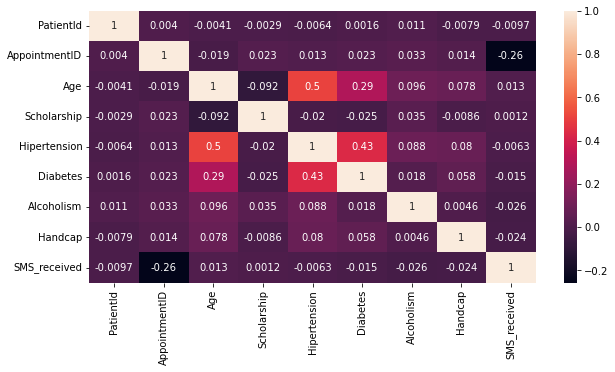

In [121]:
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(), ax=ax, annot=True);

From the overall correlation of our data we can see that Hipertension is correlated with age , same with hipertension and diabetes . 

We will go more in details later on .

**Recap** : 

There are no missing values in our data 

We have a lot of categorical features that we need to change their types 

We need to change date features to Datetime types

Overall the data looks clean , it just needs some small changes



### Data Cleaning   

In [122]:
df['Showed']= df['No-show'].replace({'No': 'Yes', 'Yes': 'No'})
df.drop(columns=['No-show'],inplace=True) 
df.head(3) 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,Yes


Inversing the binary values of our target value (this will not affect our analysis it will just make it more clear)

In [123]:
df.set_index('AppointmentID', inplace=True) 

AppointmentID will be our new index 


In [124]:
df.rename(columns={'Neighbourhood':'Neighborhood', 'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show', }, inplace=True)


All the typos have been fixed

In [125]:
# removing nevative age rows 
df = df[df['Age']>0]
df['Age'].describe()  

count    106987.000000
mean         38.316085
std          22.466214
min           1.000000
25%          19.000000
50%          38.000000
75%          56.000000
max         115.000000
Name: Age, dtype: float64

Our age column is now clean

In [126]:
#I think we only need the day of the week extracted from this column , I think it's sufficient for our analysis
df.drop(columns=['ScheduledDay'],inplace=True)  
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.strftime('%A')
df.head(5)       

,PatientId,Gender,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed
AppointmentID,,,,,,,,,,,,
5642903,2.987250e+13,F,Friday,62,JARDIM DA PENHA,0,1,0,0,0,0,Yes
5642503,5.589978e+14,M,Friday,56,JARDIM DA PENHA,0,0,0,0,0,0,Yes
5642549,4.262962e+12,F,Friday,62,MATA DA PRAIA,0,0,0,0,0,0,Yes
5642828,8.679512e+11,F,Friday,8,PONTAL DE CAMBURI,0,0,0,0,0,0,Yes
5642494,8.841186e+12,F,Friday,56,JARDIM DA PENHA,0,1,1,0,0,0,Yes


Extracting valuable information from Date columns

In [127]:
# replacing binary features with yes and no instead of 0's and 1's to make it more clear 
binary_categ_cols = ['Scholarship' , 'Hypertension' ,'Diabetes','Alcoholism'  ,'SMS_received' ]
for col in binary_categ_cols : 
    df[col].replace({1: 'Yes', 0: 'No'} , inplace=True)
# from value_counts cell above I noticed that the handicap column only has 5 different unique values , considering that 0 indicates that
# the patient is not handicapped , I assumed that there were 4 different handicap variations 
df['Handicap'].replace({0: 'No Handicap', 1: 'Type_1',2: 'Type_2',3: 'Type_3',4: 'Type_4'} , inplace=True)

Data transformation

**Recap** : All is clear now , everything is good I think we are ready to do some analysis

<a id='eda'></a>
## Exploratory Data Analysis




In [130]:
# functions de be used in the future 
def categ_bar_pourcent(df_,x_,y_,aspect_) : 
    x,y = x_, y_

    df1 = df_.groupby(x)[y].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1 ,aspect=aspect_)
    g.ax.set_ylim(0,100)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height() +0.7
        g.ax.text(txt_x,txt_y,txt) 

def categ_bar_pourcent_2(df_ , x_,y_,aspect_):
    x,y= x_,y_

    df_binned1 =df_.groupby(x)[y].value_counts(normalize=True)
    df_binned1 =df_binned1.mul(100)
    df_binned1 =df_binned1.rename('percent').reset_index()

    g = sns.catplot(x=x,y='percent',hue='level_1',kind='bar',data=df_binned1 , aspect=5 , height=4 )
    g.ax.set_ylim(0,70)

    for p in g.ax.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x() 
        txt_y = p.get_height() +0.7
        g.ax.text(txt_x,txt_y,txt) 

These functions will help us plotting data

### 1: what is the overall distribution of our Show and No-show feature in our data ? 

Yes    79.735856
No     20.264144
Name: Showed, dtype: float64


<AxesSubplot:>

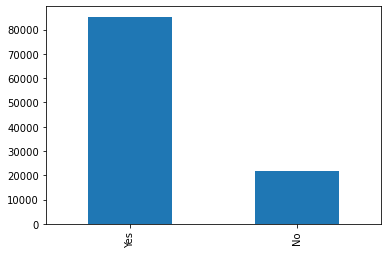

In [131]:
ratios= df.Showed.value_counts() / len(df) *100
print(ratios) 
df.Showed.value_counts().plot(kind='bar') 

Looks like 80% of patients show up to their appointments , Let's keep digging further in order to understand the situation with the other 20%

### 2: How does gender act with our problem ? 

F    65.538804
M    34.461196
Name: Gender, dtype: float64


<AxesSubplot:>

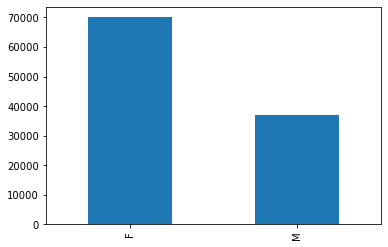

In [132]:
ratios= df.Gender.value_counts() / len(df) *100
print(ratios)
df.Gender.value_counts().plot(kind='bar')  

Most of our data contains information about female patients (65.53%) compared to Male patients (34.46%)

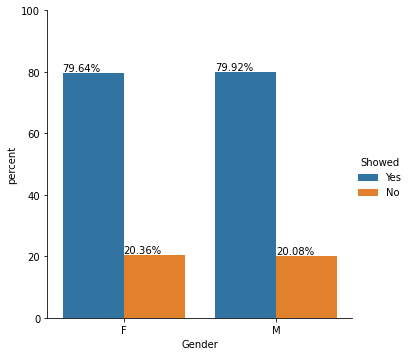

In [133]:
# let's see how both genders act with absences 
categ_bar_pourcent(df,'Gender','Showed',1)   

Looking at the chart we see no major differences , Males are just slightly less absent at their appointments than females , so I think Gender is not something to consider as impactful 

### 3: What are the main reasons patients don't show up ? 

In order to answer this question I am going to try to go through a full indepth analysis of each feature

#### 3.1: Age 

38.31608513183845


c:\Users\ahmed\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


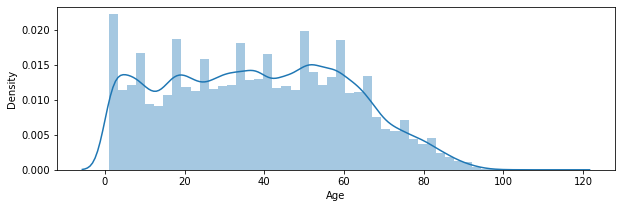

In [134]:
plt.figure(figsize=(10,3))
print( df.Age.mean())      
sns.distplot(df.Age );

The average age for our data is 38

Distribution of Age is positively skewed , no outliers only for one extreme case but I am not going to delete because it is logical

Female vs Male average age :  39.84918280612681  -  35.40041769508259


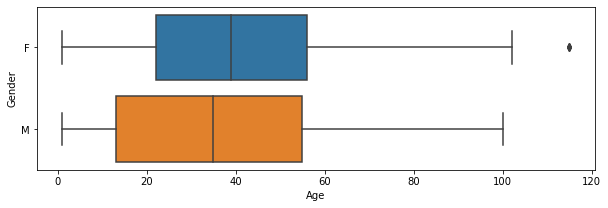

In [135]:
# Seeing the distribution of age by gender 
plt.figure(figsize=(10,3))
sns.boxplot(data=df ,  y=df.Gender ,x = df.Age )  

f =df[df['Gender']=='F']['Age'].mean()
m =df[df['Gender']=='M']['Age'].mean() 
print('Female vs Male average age : ' , f ,' - ', m ) 

#sns.displot(df.Age , hue=df.Gender) 

Looks like in our dataset , the average age for women is bigger than the average age for men 

<AxesSubplot:xlabel='Age', ylabel='count'>

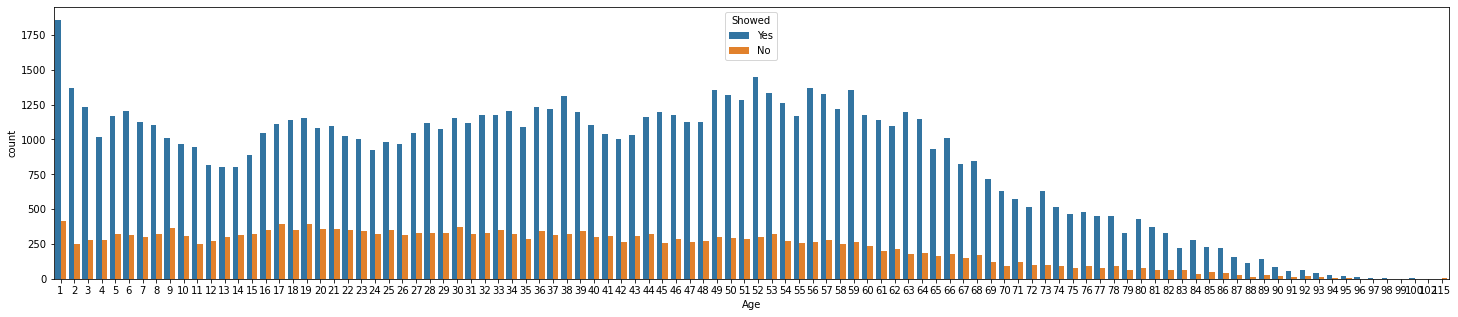

In [136]:
plt.figure(figsize=(25,5))

sns.countplot(x=df.Age ,hue=df.Showed,data=df)

This doesn't describe the idea clearly , so I think binning the age column into categories is the best option

In [137]:
# creating a copy so we don't damage the main dataset in case things went wrong 
df_binned = df.copy()
bins= [0,2,5,13,20,65,115]
labels = ['Infant','Toddler','Kid','Teen','Adult','Elder']
df_binned['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
df_binned.head(3)

,PatientId,Gender,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed,AgeGroup
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,Friday,62,JARDIM DA PENHA,No,Yes,No,No,No Handicap,No,Yes,Adult
5642503,5.589978e+14,M,Friday,56,JARDIM DA PENHA,No,No,No,No,No Handicap,No,Yes,Adult
5642549,4.262962e+12,F,Friday,62,MATA DA PRAIA,No,No,No,No,No Handicap,No,Yes,Adult


This table has age ranges classified so it will be beneficial for future analysis

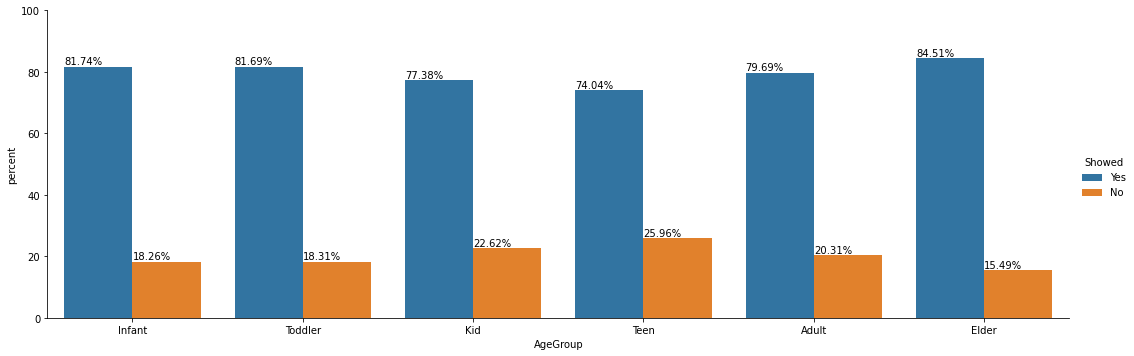

In [138]:
categ_bar_pourcent(df_binned,'AgeGroup','Showed',3)   

This is more clear now , we notice that teens and kids are more likely to skip their appointments than any other . 

On the other hand it is completely the opposite for elders . 

<AxesSubplot:xlabel='Age', ylabel='Handicap'>

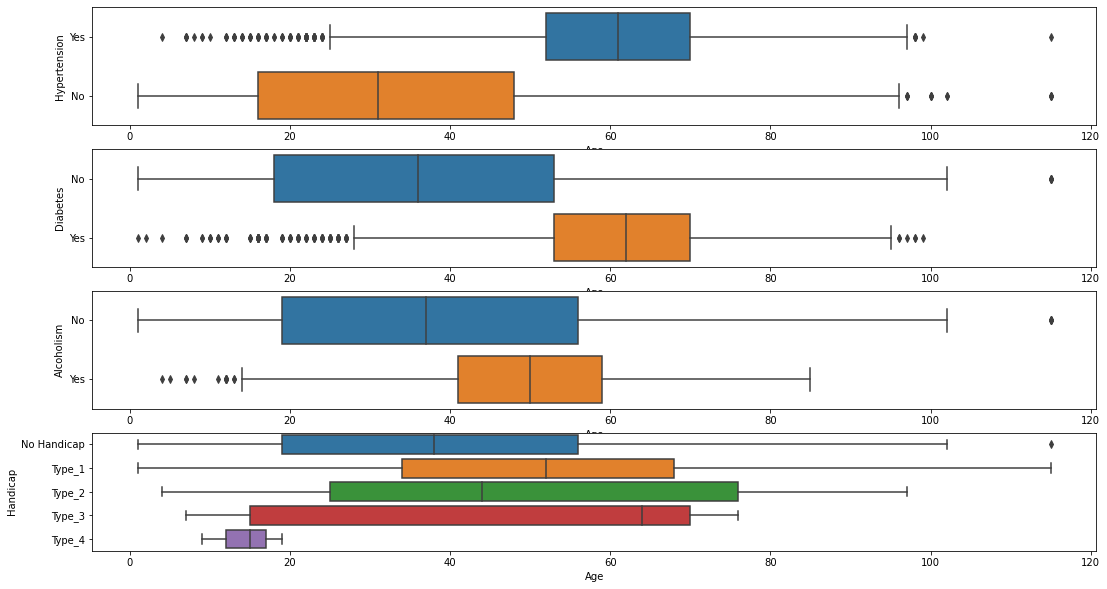

In [139]:
fig, axes = plt.subplots(4, 1, figsize=(18, 10))
sns.boxplot(ax=axes[0], data=df, y=df.Hypertension, x=df.Age)
sns.boxplot(ax=axes[1], data=df, y=df.Diabetes, x=df.Age) 
sns.boxplot(ax=axes[2], data=df, y=df.Alcoholism, x=df.Age)
sns.boxplot(ax=axes[3], data=df, y=df.Handicap, x=df.Age) 

It is clear now why elders tend to attend their appointments . By looking at these boxplots we can see that the older a patient is the more likely he is to get diagnosed with those different types of diseases and handicaps 

#### 3.2: Neighborhood 

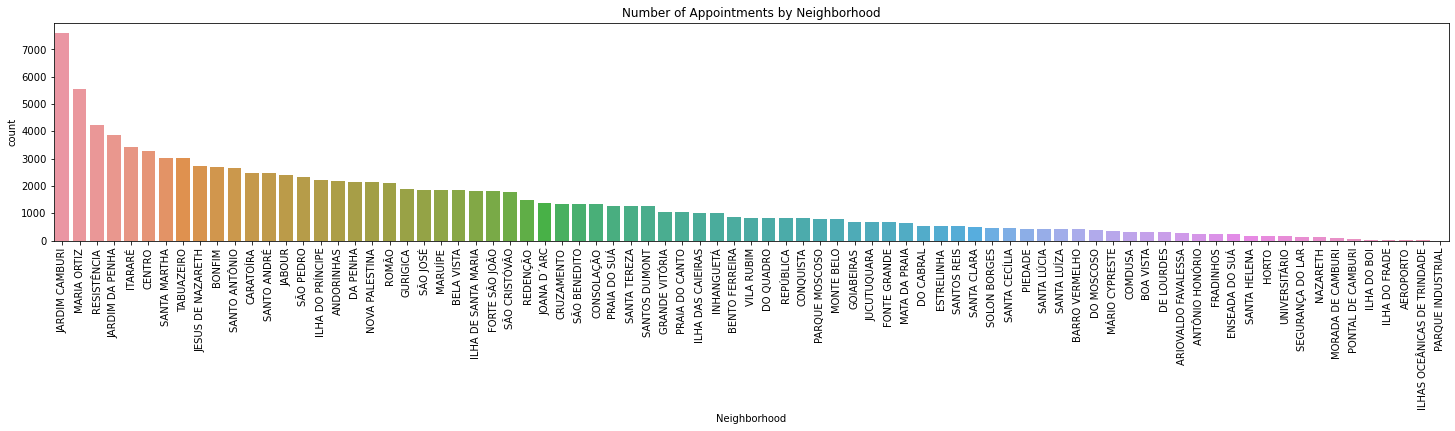

In [140]:
# let's see the Neighborhoods with the most appointments
plt.figure(figsize=(25,4))
plt.xticks(rotation=90) 
ax = sns.countplot(x=df.Neighborhood , order=df.Neighborhood.value_counts().index )
ax.set_title("Number of Appointments by Neighborhood")
plt.show() 

From this chart we can see that the number of Neighbourhoods is very large , and there is very low counts of some ones .

Going through all of these Neighbourhood is not useful for our analysis it will take a lot of time and the information will not very relevant. 

So we are going to focus on some specific ones , more precisely the Neighbourhoods with the most no-show rates  

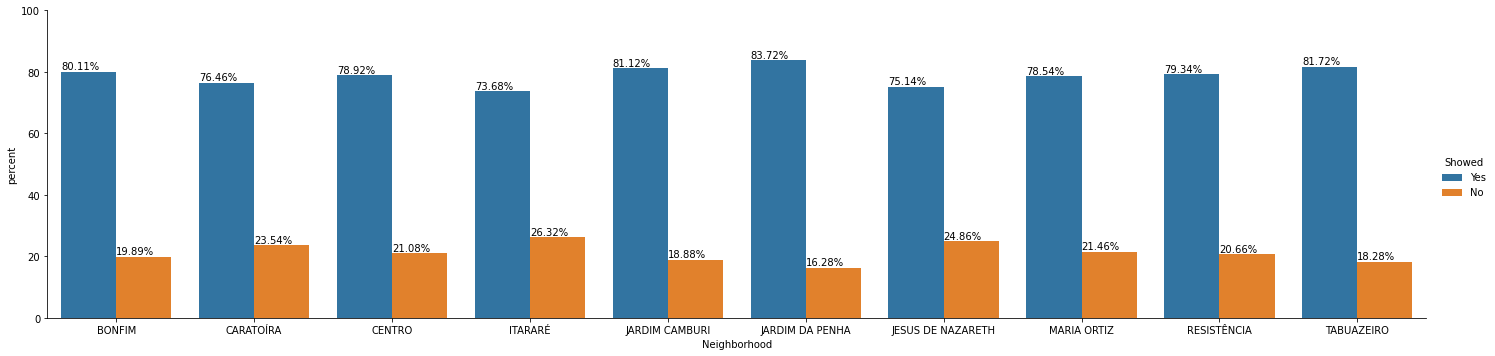

In [141]:
# extracting the top 10 neighbourhoods with the most no-show count
neighbourhoods_NoShow_list =  df[df.Showed=='No'].Neighborhood.value_counts().head(10).index.to_list() 
#putting them in a new df
df_neighbourhoods_NoShow_list = df[df.Neighborhood.isin(neighbourhoods_NoShow_list)] 

categ_bar_pourcent(df_neighbourhoods_NoShow_list,'Neighborhood','Showed',4)  

Here are the Top 10 Neighbourhoods with the most no-show rates . 

We notice that neighbourhoods like 'ITARARÉ' 'CARATOÍRA' 'JESUS DE NAZARETH' have the most no-show rates . Let's see what is the problem

In [142]:
df_top3_NoShow_Neighbourhoods =df_binned[df_binned.Neighborhood.isin(['ITARARÉ','CARATOÍRA','JESUS DE NAZARETH']) ]
df_top3_NoShow_Neighbourhoods.head(3) 

,PatientId,Gender,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Showed,AgeGroup
AppointmentID,,,,,,,,,,,,,
5639602,2.373717e+13,M,Friday,17,ITARARÉ,No,No,No,No,No Handicap,No,No,Teen
5641470,5.637725e+14,F,Friday,62,ITARARÉ,No,No,No,No,No Handicap,No,Yes,Adult
5641472,2.147153e+12,F,Friday,16,ITARARÉ,No,No,No,No,No Handicap,No,Yes,Teen


This new table contains only information about the top 3 Neighbourhoods with the highest no-show rates

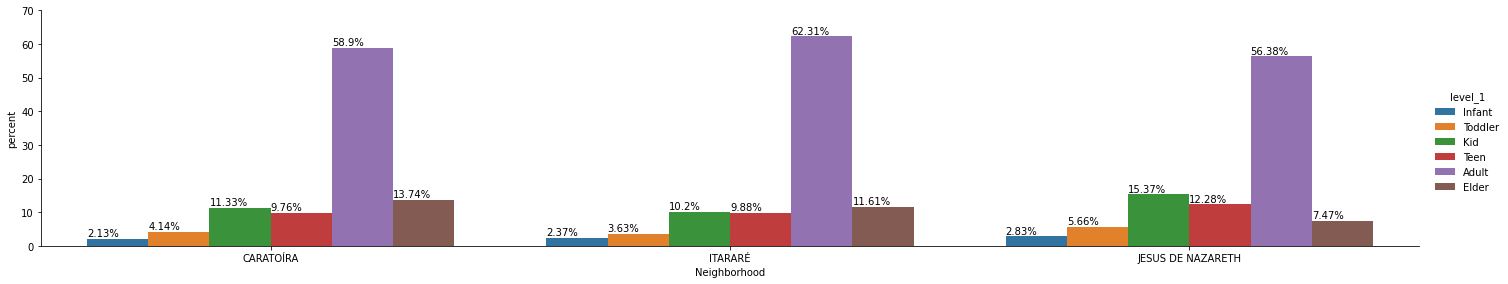

In [143]:
categ_bar_pourcent_2(df_top3_NoShow_Neighbourhoods , 'Neighborhood','AgeGroup',5)

Most of the population in these Neighborhoods are adults , kids and teens .  

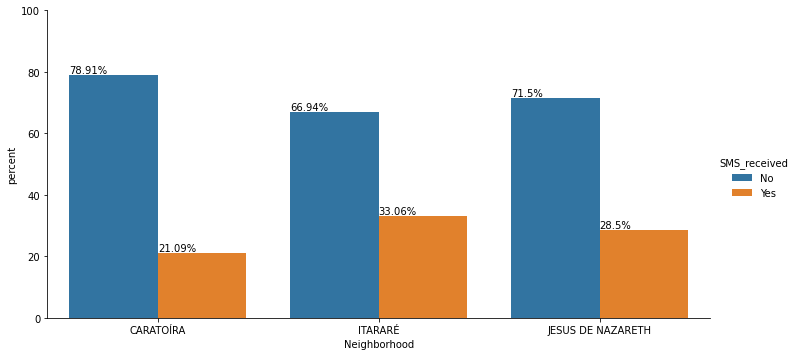

In [144]:
categ_bar_pourcent(df_top3_NoShow_Neighbourhoods , 'Neighborhood', 'SMS_received' , 2 )

Looks like the SMS notification really has a big impact , it appears that people living in these neighbourhoods didn't receive SMS messages as a reminder for their appointments . 

#### 3.3: SMS 

No     67.673643
Yes    32.326357
Name: SMS_received, dtype: float64


<AxesSubplot:>

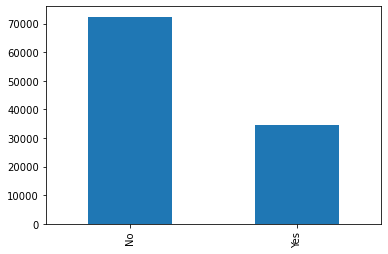

In [145]:
ratios= df.SMS_received.value_counts() / len(df) *100
print(ratios)
df.SMS_received.value_counts().plot(kind='bar') 

Not many SMS messages were sent to users

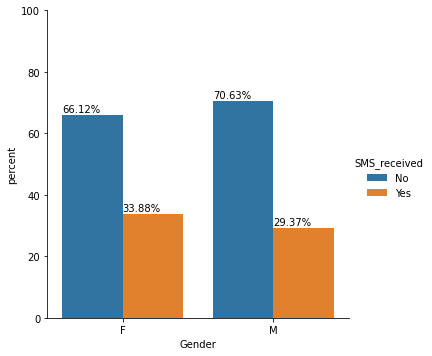

In [146]:
categ_bar_pourcent(df , 'Gender', 'SMS_received' , 1 ) 


Seems like more SMS messages were sent to female patients

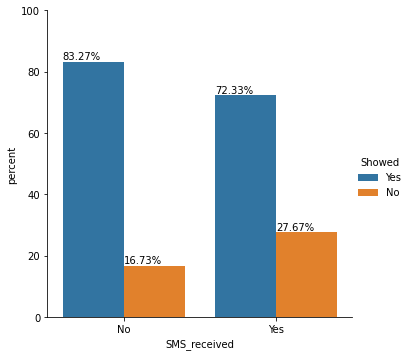

In [147]:
categ_bar_pourcent(df , 'SMS_received', 'Showed' , 1 ) 


Looks like people who didn't receive an SMS message are more likely to not miss their appointment , this contradicts the previous analysis we did on neighbourhoods but mabye that was an exception 

### 4: What are the days with the lowest show up rate ? 

Wednesday    23.451447
Tuesday      23.209362
Monday       20.472581
Friday       17.259106
Thursday     15.571051
Saturday      0.036453
Name: AppointmentDay, dtype: float64


<AxesSubplot:xlabel='AppointmentDay', ylabel='count'>

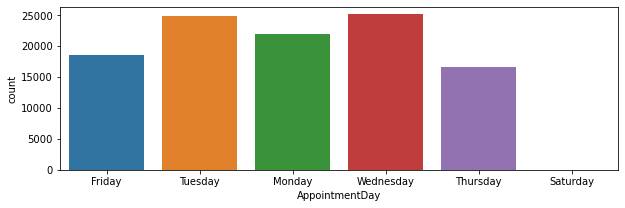

In [148]:
plt.figure(figsize=(10,3))
print(df.AppointmentDay.value_counts(normalize=True)*100)
sns.countplot(data = df , x =df.AppointmentDay) 

looks like appointments on Saturdays are very less likely , they only represent 0.036% of our data

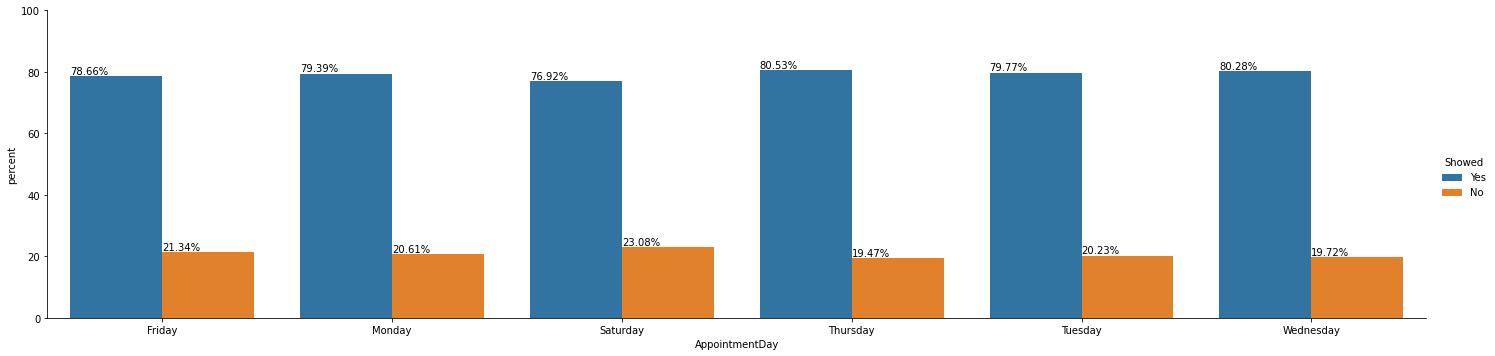

In [149]:
categ_bar_pourcent(df , 'AppointmentDay', 'Showed' , 4 ) 


It's very surprising to see that Saturdays are the least days with appointments yet the have the highest rate of No-show 

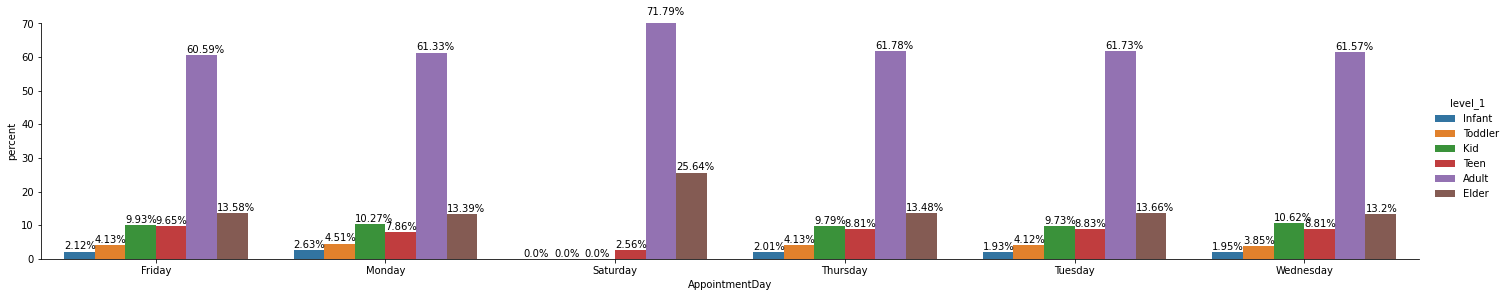

In [150]:
categ_bar_pourcent_2(df_binned ,'AppointmentDay', 'AgeGroup' , 5 ) 

Looks like they often give appointments for elders on Saturdays , thus the population of elders don't justify most of the absences , it is mostly from adults .

<a id='conclusions'></a>
## Conclusions

**Following the study here are our results :**

-Most of the patients are females , thus there is no major difference in attendance ratios of both genders

-Females on average are older than males

-The older a patient gets the more likely he is to be diagnosed with different diseases

-Teens and adults are more likely to skip appointments unlike elders 

-Neighbourhoods like 'ITARARÉ'  'CARATOÍRA'  'JESUS DE NAZARETH' have the highest no-show rates one of the reasons is that they didn't get SMS messages

-People who don't receive SMS messages are more likely to attend their appointment 

-Most appointments are givin on Wednesdays and Tuesdays unlike Saturdays with the least appointments 

-Saturdays being the days with the least appointments yet their no-show rates are the highests

-There is spike in the number of elder patients on Saturdays unlike usual days 

**Limitations :**

-The data is very small considering it only contains information of a few months so we can't explore and dig deeper to get the full picture 

